# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd
import math

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of validation examples
n_validation = len(valid['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

# Data Types
X_data_type = X_train[600].dtype
y_data_type = y_train[600].dtype

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print()
print("X data Type: {}".format(X_data_type))
print("y data Type: {}".format(y_data_type))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

X data Type: uint8
y data Type: uint8


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

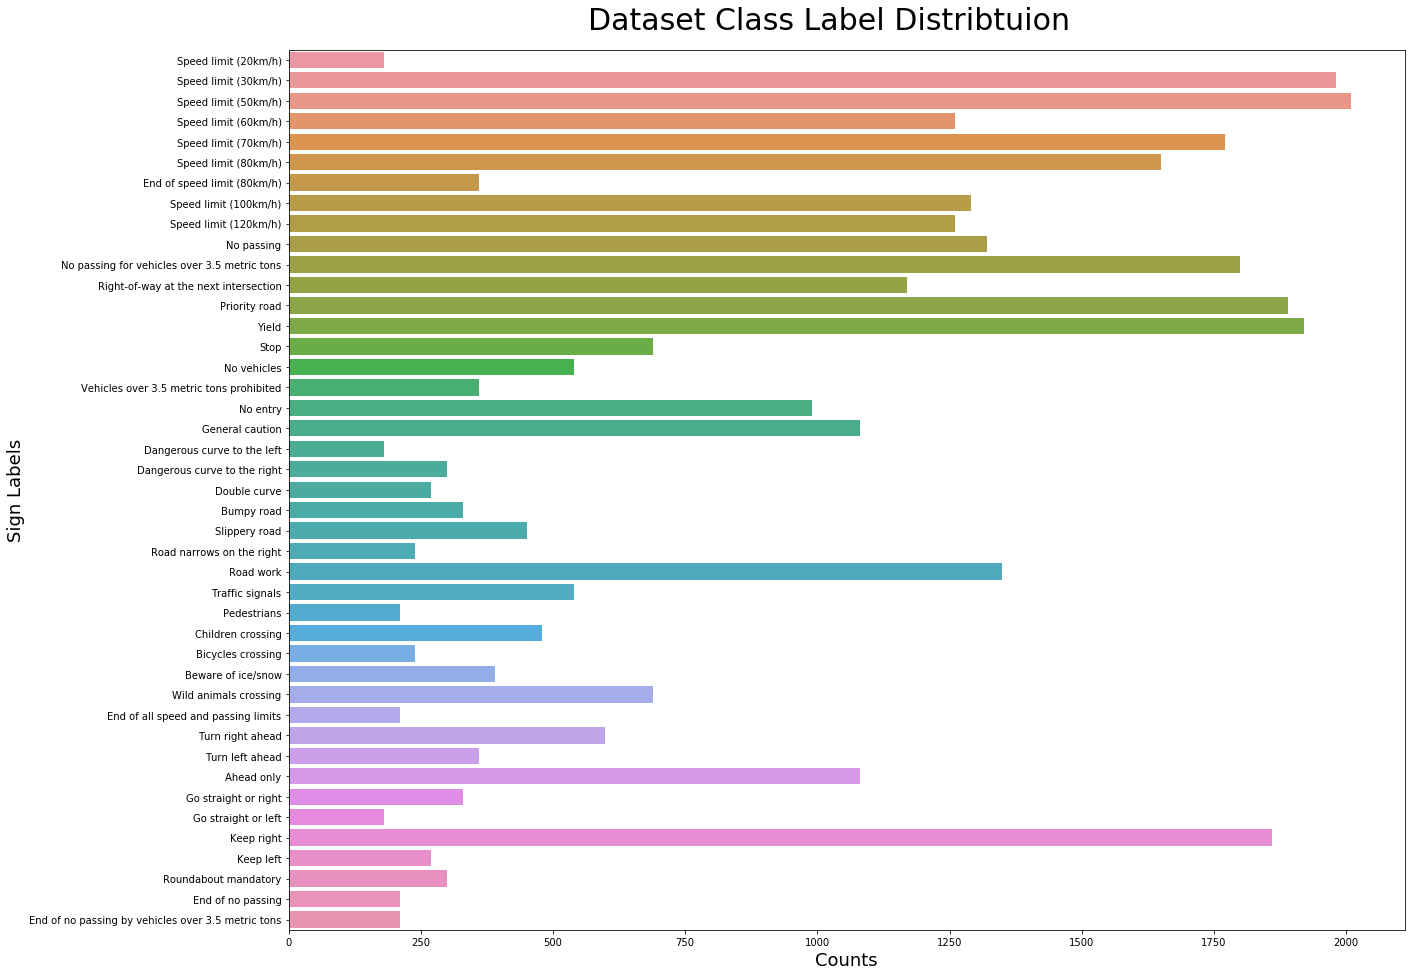

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the sign names 
sign_names_df = pd.read_csv('signnames.csv')
signs = sign_names_df['SignName'].tolist()

# Visualize the Class Distributions 
def class_dist(data):
    plt.figure(figsize=(20, 15))
    plt.suptitle('Dataset Class Label Distribtuion', fontsize=30)
    sns.countplot(y=data)
    plt.yticks(np.arange(n_classes), signs, rotation=0)
    plt.xlabel('Counts', fontsize=18)
    plt.ylabel('Sign Labels', fontsize=18)
    plt.subplots_adjust(top=0.94)
    plt.show()
    
class_dist(train['labels'])

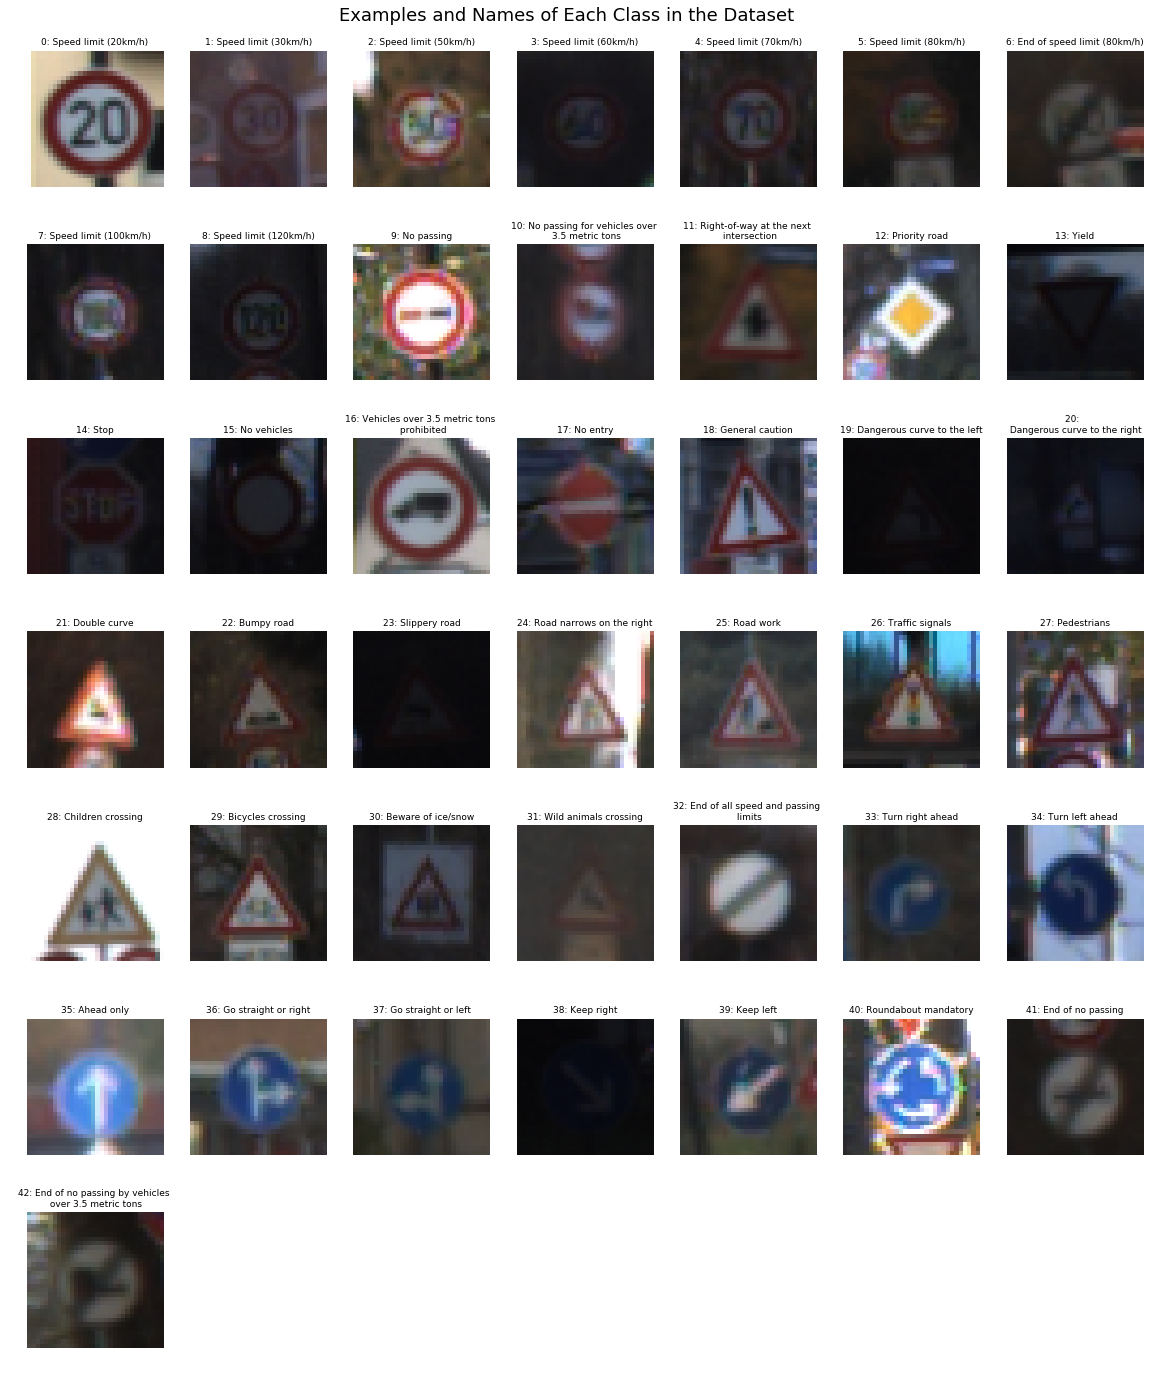

In [4]:
# images from each of the classes 
# setup variables 
n_rows = 7
n_cols = math.ceil(n_classes / n_rows)
x, y = [0, 0]

# plot setup 
f, axes = plt.subplots(n_rows, n_cols, figsize=(20, 22))
plt.suptitle('Examples and Names of Each Class in the Dataset', fontsize=18)

# loop through n_classes 
for i in range(n_classes):
    image = X_train[np.where(y_train == i)[0][0]]
    axes[y, x].imshow(image)
    axes[y, x].axis('off')
    sign_name = sign_names_df.iloc[i]['SignName']
    if len(sign_name) > 27: 
        words = sign_name.split(' ')
        count, index = (0, 0)
        for j, word in enumerate(words): 
            count += len(word)
            if count >= 27: 
                index = j
                break
        axes[y, x].set_title('{}: {} \n {}'.format(i, ' '.join(words[:index]), ' '.join(words[index:])), fontsize=9)    
    else:
        axes[y, x].set_title('{}: {}'.format(i, sign_name), fontsize=9)
    
    # increment x & y to control plot axes 
    if x < n_cols - 1: 
        x += 1
    else:
        y += 1
        x = 0 

# hide extra axes 
for i in range((n_rows * n_cols) - n_classes):
    axes[-1, -i - 1].axis('off')

plt.subplots_adjust(top=0.96)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Hepler functions for preprocessing images
import cv2

# Sources:
# http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
# https://stackoverflow.com/questions/24341114/simple-illumination-correction-in-images-opencv-c/24341809#24341809

def normalize(images): 
    '''Normalize the images for ~ zero mean and equal variance.'''
    return (images - 128) / 128


def hist_equalization(image):
    '''Histogram Equalization to improve contrast.'''
    img = image.copy()
    for i in range(3):
        img[:,:,i] = cv2.equalizeHist(img[:,:,i])
        
    return img


def clahe_equalization(image):
    '''CLAHE Equalization to improve contrast.'''
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4, 4))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)


def grayscale(image):
    '''Convert Image to Grayscale.'''
    gray = 0.299*image[:, :, 0] + 0.587*image[:, :, 1] + 0.114*image[:, :, 2]
    return gray.reshape(gray.shape + (1,)) 
    

# Helper functions for more translated and skewed data creation

# Sources: 
# http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html
# http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/warp_affine/warp_affine.html

def translate(image, pixel_range=2):
    '''Randomly translate an input image by a value + or - the provided pixel_range.'''
    rows, cols = image.shape[:2]
    delta_w, delta_h = np.random.randint(-pixel_range, pixel_range, 2)
    M = np.float32([[1, 0, delta_w],[0, 1, delta_h]])
    
    return cv2.warpAffine(image, M, (cols, rows))

    
def scale(image, low=0.9, high=1.1):
    '''Randomly scale an input image by a value + or - the provided scale factor range.'''
    rows, cols = image.shape[:2]
    scale = np.random.uniform(low, high)
    px = cols-cols*scale
    pts1 = np.float32([[0, 0], [rows, 0], [0, cols], [rows, cols]])
    pts2 = np.float32([[px, px],[rows-px, px],[px, cols-px],[rows-px, cols-px]])
    M = cv2.getPerspectiveTransform(pts1,pts2)

    return cv2.warpPerspective(image, M, (rows, cols))


def rotate(image, angle_range=15):
    '''Randomly rotate an input image by a value within + or - the provided angle range.'''
    rows, cols = image.shape[:2]
    angle = np.random.uniform(angle_range)-angle_range/2  
    image_center = (cols/2, rows/2)
    M = cv2.getRotationMatrix2D(image_center, angle, scale=1)
    
    return cv2.warpAffine(image, M, (cols, rows))


def warp(image, shear_range=2):
    '''Randomly warp an image by a value within + or - the provided shear range.'''
    rows, cols = image.shape[:2]
    pts1 = np.float32([[5, 5],[20, 5],[5, 20]])
    p1 = 5 + np.random.uniform(-shear_range, shear_range)
    p2 = 20 + np.random.uniform(-shear_range, shear_range)
    pts2 = np.float32([[p1, 5],[p2, p1],[5, p2]])
    M = cv2.getAffineTransform(pts1, pts2)

    return cv2.warpAffine(image, M, (cols, rows))

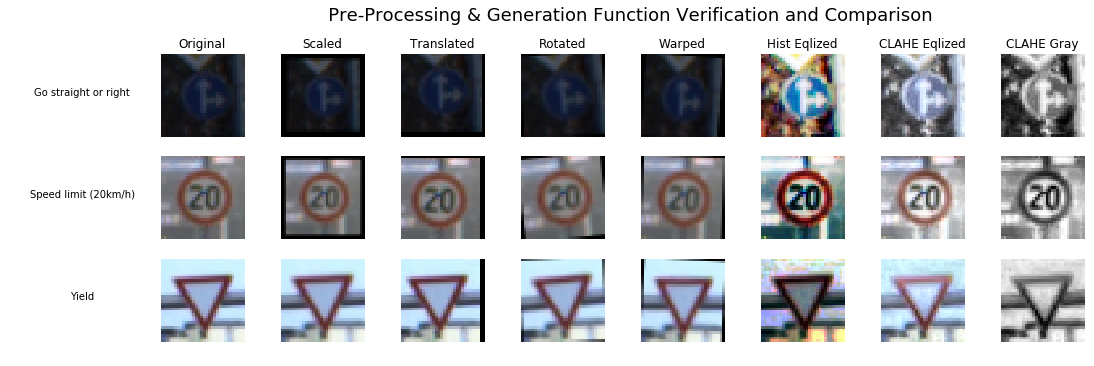

In [6]:
# check & verify helper functions
rows, cols = (3, 9)
f, axes = plt.subplots(rows, cols)
f.set_size_inches(15, 5)
plt.suptitle(' ' * 27 + 'Pre-Processing & Generation Function Verification and Comparison', fontsize=18)
x, y = [0, 0]
titles = ['', 'Original', 'Scaled', 'Translated', 'Rotated', 
          'Warped', 'Hist Eqlized', 'CLAHE Eqlized', 'CLAHE Gray']

for i in [1000, 10000, 22000]:
    img = X_train[i]
    for index, j in enumerate(['', img, scale(img), translate(img), rotate(img), 
                               warp(img), hist_equalization(img), clahe_equalization(img), 
                               grayscale(clahe_equalization(img))]):
        if y == 0:
            axes[y, x].set_title(titles[index])
        if index == 0:
            axes[y, x].text(0.5, 0.5, sign_names_df.iloc[y_train[i]]['SignName'], 
                            horizontalalignment='center', fontsize=10)
        elif index == 8:
            axes[y, x].imshow(j.squeeze(), cmap='gray')
        else:
            axes[y, x].imshow(j)
        axes[y, x].axis('off')
        
        if x < (cols - 1):
            x += 1
        else:
            x = 0 
            y += 1

plt.tight_layout(pad=0.1)
plt.subplots_adjust(top=0.85)
plt.show()

**NOTES:** Histogram Equalization holds better original color rendering as opposed to CLAHE Equaliztion.  However, CLAHE better reflects the original image, so I'll be using this method for preprocessing and data creation.  

In [7]:
# create more training data from pre-processing helper functions 
def create_transformed_images(num_of_each, X_train, y_train):
    '''Generate transformed images for the X_train dataset.'''
    num_classes = len(np.unique(train['labels']))
    X_data = []
    y_data = []
    for img_index in range(len(X_train)):
        for i in range(num_of_each):
            y_data.append(y_train[img_index])
            X_data.append(grayscale(clahe_equalization(warp(rotate(translate(scale(X_train[img_index])))))))
            
    # ensure image arrays are saved as the same dtype as the original dataset  
    X_data = np.array(X_data, dtype = np.uint8())
    y_data = np.array(y_data, dtype = np.uint8())
    
    return X_data, y_data

# Add 5 addtional jittered images created from each image  
# Source: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
gen_X, gen_y = create_transformed_images(2, X_train, y_train)

print('# of X generated: {}'.format(len(gen_X)))
print('# of Y generated: {}'.format(len(gen_y)))

# of X generated: 69598
# of Y generated: 69598


X generated data type: uint8
y generated data type: uint8


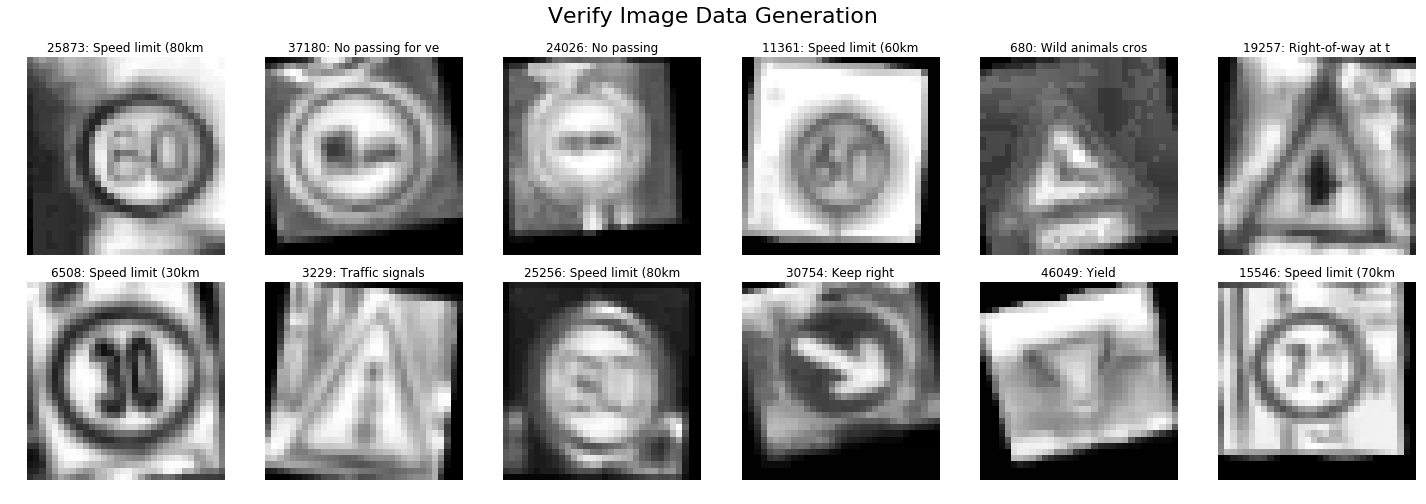

In [8]:
# Check generated Data 
random_indexes = np.random.choice(range(len(gen_X)), 12)
print('X generated data type: {}'.format(gen_X[random_indexes[1]].dtype))
print('y generated data type: {}'.format(gen_y[random_indexes[1]].dtype))

f, axes = plt.subplots(2, 6)
f.set_size_inches(20, 7)
x, y = [0, 0]

for i in random_indexes:
    axes[y, x].imshow(gen_X[i].squeeze(), cmap='gray')
    axes[y, x].set_title("{}: {}".format(i, sign_names_df.iloc[gen_y[i]]['SignName'][0:17]))
    axes[y, x].axis('off')
    
    if x < 5:
        x += 1
    else:
        y += 1
        x = 0 

plt.suptitle('Verify Image Data Generation', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [9]:
# pre-process original images
X_train_proccessed = [grayscale(clahe_equalization(X_train[i])) for i in range(len(X_train))]
X_valid_proccessed = [grayscale(clahe_equalization(X_valid[i])) for i in range(len(X_valid))]
    
print(len(X_train_proccessed), '=', len(X_train))
print(len(X_valid_proccessed), '=', len(X_valid))

34799 = 34799
4410 = 4410


In [11]:
# add gen_X and gen_Y to the training set
X_train_increased = np.concatenate((X_train_proccessed, gen_X))
y_train_increased = np.concatenate((y_train, gen_y))

# normalize the train images 
X_train_normalized = normalize(X_train_increased)
X_valid_normalized = normalize(np.array(X_valid_proccessed))

# verify data creation & normalization 
print('X_train size: {} + gen_X size: {} = X_train_nomalized Size: {}'.format(
      len(X_train), len(gen_X), len(X_train_normalized)))
print('y_train size: {} + gen_y size: {} = y_train_increased Size: {}'.format(
      len(y_train), len(gen_y), len(y_train_increased)))
print()
print("X Train Mean: {}".format(np.mean(X_train_increased)))
print("X Train Normalized Mean: {}".format(np.mean(X_train_normalized)))
print("X Valid Mean: {}".format(np.mean(X_valid_proccessed)))
print("X Train Normalized Mean: {}".format(np.mean(X_valid_normalized)))

X_train size: 34799 + gen_X size: 69598 = X_train_nomalized Size: 104397
y_train size: 34799 + gen_y size: 69598 = y_train_increased Size: 104397

X Train Mean: 144.56353266609386
X Train Normalized Mean: 0.12940259895385703
X Valid Mean: 156.6422200314891
X Train Normalized Mean: 0.22376734399600903


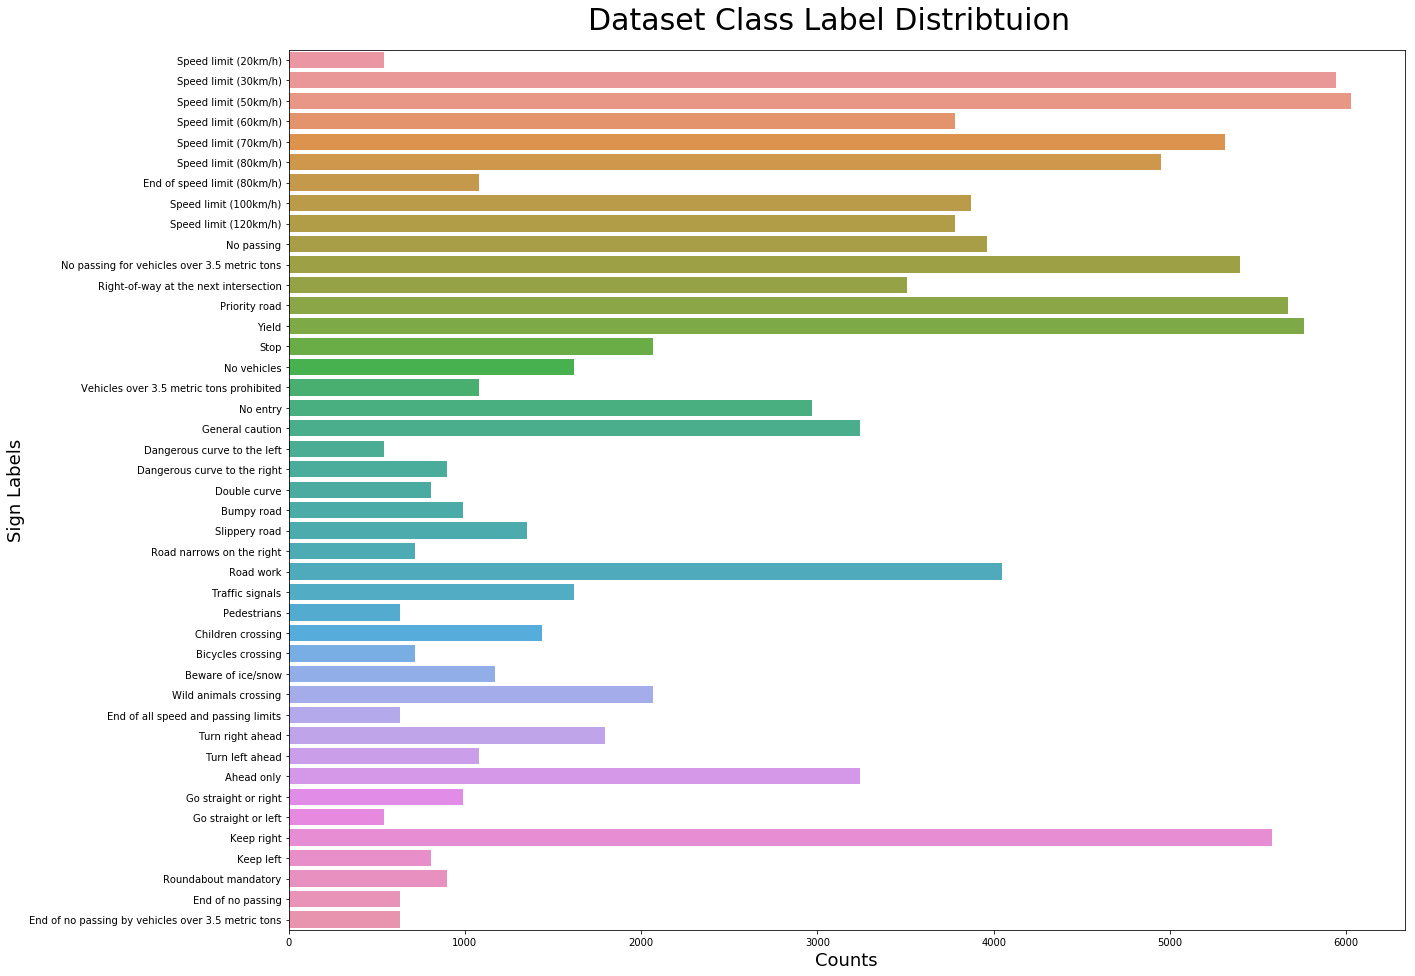

In [12]:
# recheck class distributions
# these we intentially kept ununiform as these are the distributions we'd expect to see on the road 
class_dist(y_train_increased)

### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128

# LeNet Architecture (Base Line)

![LeNet](lenet.png)

In [14]:
# LeNet implementation
def LeNet(x):
    # Hyperparameters 
    mu = 0
    sigma = 0.01
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 6], mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(pool_2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b 
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b 
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes). 
    fc3_w = tf.Variable(tf.truncated_normal(shape=[84, n_classes], mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits

# Deep LeNet w/Dropout Architecture

![Deep LeNet](deep_lenet.png)

In [15]:
# LeNet with dropout implementation
def deep_LeNet_with_dropout(x):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_w = weights[0]
    conv1_b = tf.Variable(tf.zeros(16))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x16. Output = 14x14x16.
    pool_1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_w = weights[1]
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x64. Output = 5x5x64.
    pool_2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x64. Output = 1600.
    fc0 = flatten(pool_2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 240.
    fc1_w = weights[2]
    fc1_b = tf.Variable(tf.zeros(240))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b 
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 240. Output = 84.
    fc2_w = weights[3]
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b 
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes). 
    fc3_w = weights[4]
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [17]:
# Training pipeline
# Hyper Parameters 
rate = 0.001
beta = 0.001
mu = 0
sigma = 0.01
    
# setup the layer weights 
weights = [
    tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 16], mean=mu, stddev=sigma)),   # conv1 weight
    tf.Variable(tf.truncated_normal(shape=[5, 5, 16, 64], mean=mu, stddev=sigma)),  # conv2 weight
    tf.Variable(tf.truncated_normal(shape=(1600, 240), mean=mu, stddev=sigma)),     # fc1 weight
    tf.Variable(tf.truncated_normal(shape=(240, 84), mean=mu, stddev=sigma)),       # fc2 weight
    tf.Variable(tf.truncated_normal(shape=[84, n_classes], mean=mu, stddev=sigma))  # fc3 weight 
]

# create the optimizer 
logits = deep_LeNet_with_dropout(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
regularizer = tf.reduce_sum([tf.nn.l2_loss(w) for w in weights]) # l2 regularization 
loss = tf.reduce_mean(loss_operation + beta*regularizer)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
# model evaluation 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0 
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        loss, accuracy = sess.run((loss_operation, accuracy_operation), 
                                  feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += accuracy * len(batch_x)
        total_loss     += loss * len(batch_x)
    return (total_loss / num_examples, total_accuracy / num_examples)

In [19]:
# import shuffle 
from sklearn.utils import shuffle

valid_losses, valid_accuracies = [[],[]]
train_losses, train_accuracies = [[],[]]

# Run the tensor Session 
with tf.Session() as session: 
    session.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training the Model...')
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train_normalized, y_train_increased)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            session.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        training_loss, training_accuracy = evaluate(X_train_normalized, y_train_increased)
        validation_loss, validation_accuracy = evaluate(X_valid_normalized, y_valid)
        valid_losses.append(validation_loss)
        valid_accuracies.append(validation_accuracy)
        train_losses.append(training_loss)
        train_accuracies.append(training_accuracy)
        print('EPOCH: {:2}'.format(i+1))
        print('Training Loss:   {:.3f}, Training Accuracy:   {:.3f}'.format(training_loss, training_accuracy))
        print('Validation Loss: {:.3f}, Validation Accuracy: {:.3f}'.format(validation_loss, validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(session, 'lenet_with_dropout_gray')
    print('Model Saved.')

Training the Model...

EPOCH:  1
Training Loss:   2.551, Training Accuracy:   0.247
Validation Loss: 2.433, Validation Accuracy: 0.269

EPOCH:  2
Training Loss:   1.325, Training Accuracy:   0.577
Validation Loss: 1.116, Validation Accuracy: 0.619

EPOCH:  3
Training Loss:   0.819, Training Accuracy:   0.748
Validation Loss: 0.620, Validation Accuracy: 0.798

EPOCH:  4
Training Loss:   0.585, Training Accuracy:   0.838
Validation Loss: 0.405, Validation Accuracy: 0.868

EPOCH:  5
Training Loss:   0.439, Training Accuracy:   0.868
Validation Loss: 0.346, Validation Accuracy: 0.885

EPOCH:  6
Training Loss:   0.331, Training Accuracy:   0.907
Validation Loss: 0.226, Validation Accuracy: 0.922

EPOCH:  7
Training Loss:   0.273, Training Accuracy:   0.924
Validation Loss: 0.183, Validation Accuracy: 0.939

EPOCH:  8
Training Loss:   0.233, Training Accuracy:   0.934
Validation Loss: 0.169, Validation Accuracy: 0.944

EPOCH:  9
Training Loss:   0.198, Training Accuracy:   0.942
Validation L

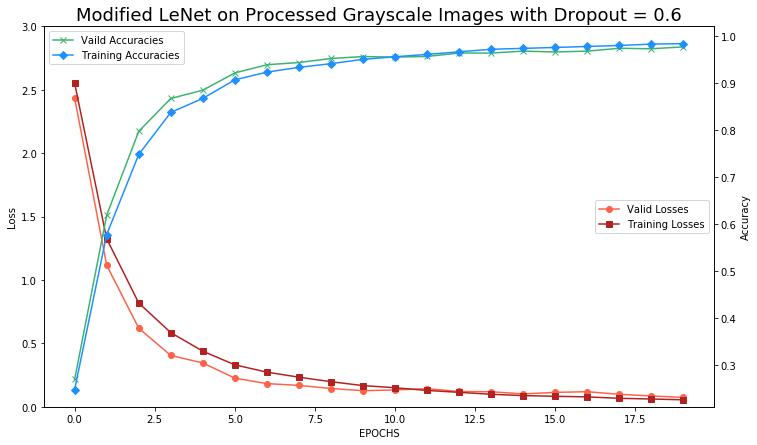

In [20]:
# plot the loss and accuracy curves for the trained model. 
f, ax = plt.subplots(1)
f.set_size_inches(12, 7)
ax2 = ax.twinx()
plt.title('Modified LeNet on Processed Grayscale Images with Dropout = 0.6', fontsize=18)

# plotting losses and accuraccies over EPOCHS 
ax.plot(valid_losses, color='tomato', marker='o', label='Valid Losses')
ax.plot(train_losses, color='firebrick', marker='s', label='Training Losses')
ax2.plot(valid_accuracies, color='mediumseagreen', marker='x', label='Vaild Accuracies')
ax2.plot(train_accuracies, color='dodgerblue', marker='D', label='Training Accuracies')

# plot formatting 
ax.set_ylim(0, 3)
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss')
ax.legend(frameon=True, loc=5)
ax2.set_ylabel('Accuracy')
ax2.legend(frameon=True)
plt.show()

# Testing the Model on the Test Set.  Target = 93.0%

In [21]:
# Preprocess Test images 
X_test_proccessed = [grayscale(clahe_equalization(X_test[i])) for i in range(len(X_test))]
X_test_normalized = normalize(np.array(X_test_proccessed))

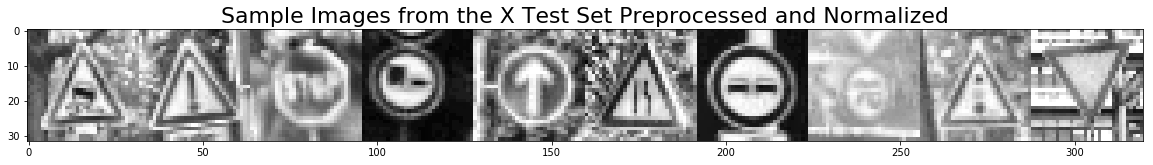

In [22]:
images = []
plt.figure(figsize=(20, 5))
plt.title('Sample Images from the X Test Set Preprocessed and Normalized', fontsize=22)
for i in np.random.choice(range(len(X_test_normalized)), 10):
    images.append(X_test_normalized[i].squeeze())
plt.imshow(np.hstack(images), cmap='gray')
plt.show()

In [23]:
# Evaluate the model on the test set
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('./lenet_with_dropout_gray.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.1f}%".format(test_accuracy[1]*100))

Test Set Accuracy = 97.0%


#### YES!! 97.0% Accuracy on the Test Data Set!

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

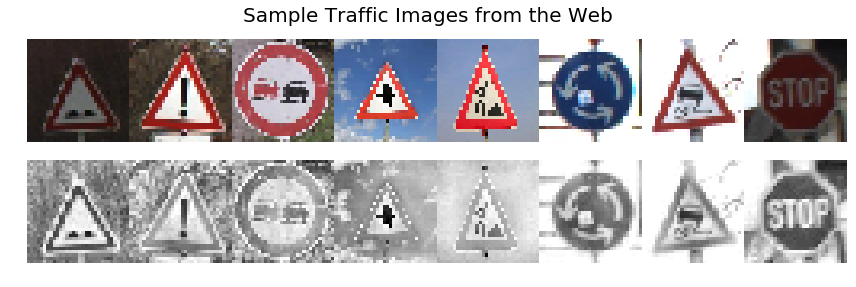

In [24]:
# Resize the Sample Images from the Web for prediction 
from PIL import Image
import os
sample_images = []
img_dir = './web-images/'

# loop through files
for f in os.listdir(img_dir):
    if f.endswith('.jpg'):
        img = Image.open(img_dir + f)
        sample_images.append(img.resize((32, 32)))
    
# process images as expect for the Nural Net
processed_sample_images = [grayscale(clahe_equalization(np.asarray(x))) for x in sample_images]
processed_sample_images = normalize(np.array(processed_sample_images))
  
# plot the Images
f, axes = plt.subplots(2, 1)
f.set_size_inches(12, 4)
plt.suptitle('Sample Traffic Images from the Web', fontsize=20)
axes[0].imshow(np.hstack(sample_images))
axes[0].axis('off')
axes[1].imshow(np.hstack([x.squeeze() for x in processed_sample_images]), cmap='gray')
axes[1].axis('off')
plt.tight_layout(h_pad=0.1)
plt.subplots_adjust(top=0.89)
plt.show()

In [25]:
# Get sample classes 
sample_classes = []
for f in os.listdir(img_dir):
    if f.endswith('.jpg'):
        sample_classes.append(int(f.split('_')[-1].split('.')[0]))
        
print(sample_classes)

[22, 18, 9, 11, 25, 40, 23, 14]


### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('./lenet_with_dropout_gray.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(processed_sample_images, sample_classes)
    print("Web Test Accuracy = {:.1f}".format(test_accuracy[1]*100))

Web Test Accuracy = 75.0


### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
logits_placeholder = tf.placeholder(tf.float32)
softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('./lenet_with_dropout_gray.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    prob = sess.run(softmax, feed_dict={x: processed_sample_images, keep_prob: 1.0})
    pred = sess.run(tf.nn.top_k(tf.constant(prob), k=5))  

In [28]:
# take a looksee at the output
pred

TopKV2(values=array([[  5.51268995e-01,   4.48574930e-01,   1.15865470e-04,
          2.04918433e-05,   8.79547315e-06],
       [  1.00000000e+00,   1.91160776e-09,   6.44887130e-11,
          1.58071798e-13,   2.50388462e-14],
       [  9.83059049e-01,   7.99729116e-03,   5.38812112e-03,
          1.68933696e-03,   8.32922873e-04],
       [  1.00000000e+00,   2.16881944e-08,   1.52727261e-10,
          6.43298609e-11,   8.12133780e-13],
       [  5.24417400e-01,   2.69499302e-01,   1.72861338e-01,
          1.23403622e-02,   5.11474768e-03],
       [  9.99816597e-01,   5.68084870e-05,   4.49563122e-05,
          3.97759068e-05,   2.62678896e-05],
       [  9.99463975e-01,   5.29195066e-04,   3.72740942e-06,
          2.08906727e-06,   8.81384608e-07],
       [  1.00000000e+00,   7.75583753e-13,   3.94281640e-14,
          1.72622858e-14,   1.68948243e-14]], dtype=float32), indices=array([[29, 22, 28, 24, 25],
       [18, 26, 27, 28, 24],
       [ 9,  3, 15,  8, 10],
       [11, 30, 12

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

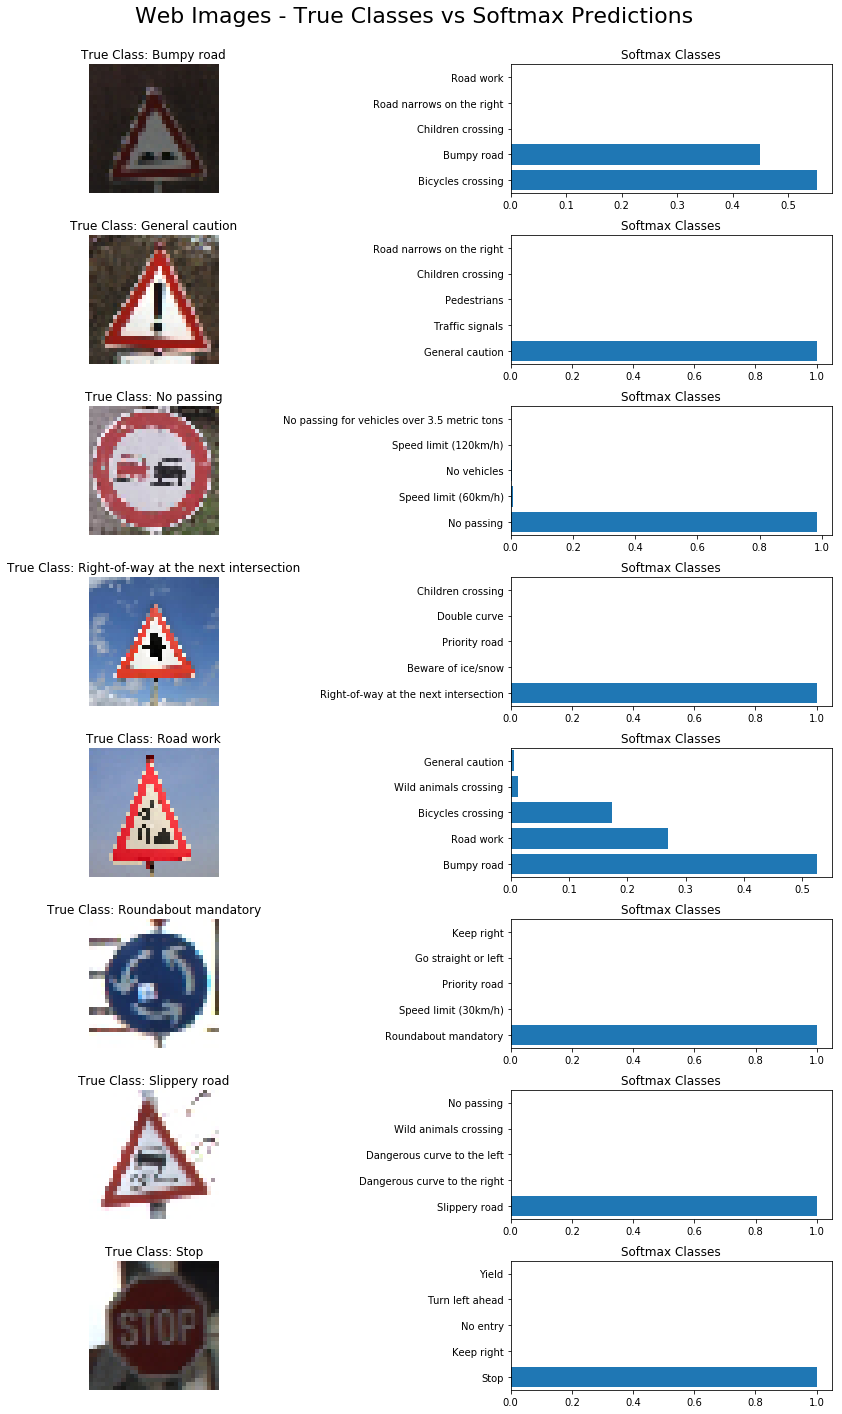

In [32]:
# Print out the top five softmax probabilities for the web images
f, axes = plt.subplots(len(processed_sample_images), 2)
f.set_size_inches(12, 20)
plt.suptitle("Web Images - True Classes vs Softmax Predictions", fontsize=22)

# create the plot
row, col = [0, 0]
for i in range(len(sample_images)):
    axes[row, col].set_title("True Class: {}".format(signs[sample_classes[i]]))
    axes[row, col].imshow(sample_images[i])
    axes[row, col].axis('off')
    col += 1
    axes[row, col].set_title("Softmax Classes")
    axes[row, col].barh(range(5), pred[0][i])
    labels = [item.get_text() for item in axes[row, col].get_yticklabels()] + ['']
    for i, x in enumerate(pred[1][i]):
        labels[i+1] = signs[x]
    axes[row, col].set_yticklabels(labels)
    axes[row, col].set_ylim(-0.5, 4.5)
    col = 0
    row += 1

# final formatting 
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the 
#### calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default 
#### matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, 
#### just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the 
    # variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
# Visualizing the Conv1 Layer
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('./lenet_with_dropout_gray.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    #conv1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(processed_sample_images[0], conv1)